## INVENTÁRIO FLORESTAL

### Métricas:

1. Dados de campo em arquivo csv já editado, limpo, com espécies corretas e diâmetros de espécies bifurcadas ajustados.


In [1]:
import os
import numpy as np
import pandas as pd
from math import pi

In [2]:
data = pd.read_csv('dados_brutos_clean.csv')
data

,id,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,ht,coord_x,coord_y
0,1,1,2526.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19,5.5,729754.298150,6.959150e+06
1,2,1,2512.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17,6.0,729754.298150,6.959150e+06
2,3,1,2513.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16,7.0,729754.298150,6.959150e+06
3,4,1,2514.0,APOCYNACEAE,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.0,729754.298150,6.959150e+06
4,5,1,2515.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28,4.5,729754.298150,6.959150e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,655,42,3141.0,Peraceae,Pera glabrata (Schott) Poepp. ex Baill.,Pera glabrata,Tabocuva,Árvore,NE,não é endêmica do Brasil,19,7.0,729918.545927,6.959837e+06
655,656,42,3140.0,MYRTACEAE,Myrceugenia euosma (O.Berg) D.Legrand,Myrceugenia euosma,Guamirim,Árvore,NE,é endêmica do Brasil,22,13.0,729918.545927,6.959837e+06
656,657,42,3142.0,BIGNONIACEAE,Jacaranda puberula Cham.,Jacaranda puberula,Caroba,Árvore,LC,é endêmica do Brasil,19,8.0,729918.545927,6.959837e+06
657,658,42,3143.0,Peraceae,Pera glabrata (Schott) Poepp. ex Baill.,Pera glabrata,Tabocuva,Árvore,NE,não é endêmica do Brasil,13,7.0,729918.545927,6.959837e+06


In [3]:
# Checar o dtype de cada campo
data.dtypes

id                           int64
parcela                      int64
placa                      float64
familia                     object
especie                     object
especie_sem_autor           object
nome_comum                  object
habito                      object
ameaca_flora_brasileira     object
endemismo                   object
cap                         object
ht                         float64
coord_x                    float64
coord_y                    float64
dtype: object

### Data Engineering

Homogeneizando a formatação dos campos de localização (coordenadas). Dados essenciais para a posterior geolocalização de cada amostra.

In [4]:
data['coord_x'] = data['coord_x'].round(3)
data['coord_y'] = data['coord_y'].round(3)

In [5]:
data.head(15)

,id,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,ht,coord_x,coord_y
0,1,1,2526.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19,5.5,729754.298,6959150.263
1,2,1,2512.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17,6.0,729754.298,6959150.263
2,3,1,2513.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16,7.0,729754.298,6959150.263
3,4,1,2514.0,APOCYNACEAE,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.0,729754.298,6959150.263
4,5,1,2515.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28,4.5,729754.298,6959150.263
5,6,1,2516.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,21,4.5,729754.298,6959150.263
6,7,1,2517.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,15,5.0,729754.298,6959150.263
7,8,1,2518.0,LAURACEAE,Nectandra oppositifolia Nees,Nectandra oppositifolia,Canela-ferrugem,Árvore,NE,não é endêmica do Brasil,21,5.5,729754.298,6959150.263
8,9,1,2520.0,EUPHORBIACEAE,Alchornea triplinervia (Spreng.) Müll.Arg.,Alchornea triplinervia,Tanheiro,Árvore,NE,não é endêmica do Brasil,38,6.0,729754.298,6959150.263
9,10,1,2519.0,MELASTOMATACEAE,Tibouchina pulchra Cogn.,Tibouchina pulchra,Quaresmeira,Árvore,NE,é endêmica do Brasil,16,4.0,729754.298,6959150.263


A coluna 'cap' está apresentando dtype do tipo 'object', quando deveria ser 'float' ou 'int'.
Ela é fundamental, pois a criação da coluna 'dap' (diâmetro a altura do peito), um dos principais parâmetros de um inventário florestal, depende de um cálculo realizado a partir de cada registro da coluna 'cap'.

In [6]:
# Como o 'dtype' resultou em 'object', é pq provavelmente deve ter dados corrompidos. 
# Vamos checar se a primeira linha está com o tipo de objeto correto, ou se todo o campo está errado
data.loc[[0],'cap']

0    19
Name: cap, dtype: object

In [7]:
# Como todo o campo está errado, devemos encontrar em qual linha está o erro.
# Por premissa técnica, sei que onde há erro, há o caracter "+"...
# ...(que havia na planilha original e que o estagiário esqueceu de ajustar)
# Então temos que localizar o índice de onde aparece o caracter "+"
contain_plus = data['cap'].str.contains('\+')
df_with_plus = data[contain_plus]
print(df_with_plus)

      id  parcela   placa    familia      especie especie_sem_autor  \
366  367       29  3490.0  MYRTACEAE  Eugenia sp.       Eugenia sp.   

    nome_comum habito ameaca_flora_brasileira endemismo    cap   ht  \
366   Guamirim      -                       -         -  15+17  5.0   

        coord_x      coord_y  
366  729971.462  6959328.223  


In [8]:
# O erro está somente no index 366 (cap = 15+17)
# Como eu sei (premissa técnica) que nesses casos o estagiário usou sempre o maior cap da célula...
# ...essa célula era para ser apenas "17"
# ...então vamos preenchê-la assim.
data.loc[366, 'cap'] = 17

In [9]:
# Checando se a linha foi corrigida:
data.loc[[366], 'cap']

366    17
Name: cap, dtype: object

In [10]:
# Agora, vamos substituir o tipo de dado da coluna 'cap'. (trocar de 'object' para 'float64')

In [11]:
data['cap'] = data['cap'].astype(float)

In [12]:
# Checando se surtiu efeito desejado:
data['cap'].dtype

dtype('float64')

In [13]:
# Agora testando novamente o cálculo do 'dap' a partir da coluna 'cap'.
# Não precisa reduzir as casas decimais, para termos maior precisão.
a = data['cap'] / pi
print(a)
print(a.max())
print(a.min())

0      6.047888
1      5.411268
2      5.092958
3      4.297183
4      8.912677
         ...   
654    6.047888
655    7.002817
656    6.047888
657    4.138029
658    7.957747
Name: cap, Length: 659, dtype: float64
63.02535746439055
3.183098861837907


In [14]:
# Criando a coluna 'dap' no dataframe, e já posicionando a coluna no local correto:
data.insert(11, 'dap', data['cap']/pi)

In [15]:
data.head(15)

,id,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,ht,coord_x,coord_y
0,1,1,2526.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19.0,6.047888,5.5,729754.298,6959150.263
1,2,1,2512.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17.0,5.411268,6.0,729754.298,6959150.263
2,3,1,2513.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16.0,5.092958,7.0,729754.298,6959150.263
3,4,1,2514.0,APOCYNACEAE,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.297183,4.0,729754.298,6959150.263
4,5,1,2515.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28.0,8.912677,4.5,729754.298,6959150.263
5,6,1,2516.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,21.0,6.684508,4.5,729754.298,6959150.263
6,7,1,2517.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,15.0,4.774648,5.0,729754.298,6959150.263
7,8,1,2518.0,LAURACEAE,Nectandra oppositifolia Nees,Nectandra oppositifolia,Canela-ferrugem,Árvore,NE,não é endêmica do Brasil,21.0,6.684508,5.5,729754.298,6959150.263
8,9,1,2520.0,EUPHORBIACEAE,Alchornea triplinervia (Spreng.) Müll.Arg.,Alchornea triplinervia,Tanheiro,Árvore,NE,não é endêmica do Brasil,38.0,12.095776,6.0,729754.298,6959150.263
9,10,1,2519.0,MELASTOMATACEAE,Tibouchina pulchra Cogn.,Tibouchina pulchra,Quaresmeira,Árvore,NE,é endêmica do Brasil,16.0,5.092958,4.0,729754.298,6959150.263


In [16]:
# Como a coluna 'id' pode causar confusão, vamos renomeá-la para 'n_arv' (número da árvore)...
# ...pois isso é o que os dados desse campo significam.
data = data.rename(columns={'id':'n_arv'})

In [17]:
data.head()

,n_arv,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,ht,coord_x,coord_y
0,1,1,2526.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19.0,6.047888,5.5,729754.298,6959150.263
1,2,1,2512.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17.0,5.411268,6.0,729754.298,6959150.263
2,3,1,2513.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16.0,5.092958,7.0,729754.298,6959150.263
3,4,1,2514.0,APOCYNACEAE,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.297183,4.0,729754.298,6959150.263
4,5,1,2515.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28.0,8.912677,4.5,729754.298,6959150.263


In [18]:
# Também vamos trocar a coluna placa para int 
try:
    data['placa'] = data['placa'].astype(int)
except:
    print("Error!")

Error!


In [19]:
# Retornou o erro: 'IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer'
# Checando se há valores NaN, pois não foi possível converter a coluna 'placa' para 'int':
data.isna().sum()

n_arv                      0
parcela                    0
placa                      1
familia                    0
especie                    0
especie_sem_autor          0
nome_comum                 0
habito                     0
ameaca_flora_brasileira    0
endemismo                  0
cap                        0
dap                        0
ht                         0
coord_x                    0
coord_y                    0
dtype: int64

In [20]:
# Para identificar onde está esse valor NaN:
nan_mask = data['placa'].isna()
print(data[nan_mask])

     n_arv  parcela  placa      familia                              especie  \
542    543       39    NaN  Cyatheaceae  Cyathea corcovadensis (Raddi) Domin   

         especie_sem_autor        nome_comum             habito  \
542  Cyathea corcovadensis  Xaxim-de-espinho  Feto arborescente   

    ameaca_flora_brasileira             endemismo   cap       dap   ht  \
542                      LC  é endêmica do Brasil  31.0  9.867606  2.0   

       coord_x      coord_y  
542  729899.59  6959809.199  


In [21]:
# checando se há algum número sequencial faltante.
data['placa'][530:550]

530    3272.0
531    3273.0
532    3274.0
533    3275.0
534    3278.0
535    3277.0
536    3276.0
537    3279.0
538    3287.0
539    3284.0
540    3286.0
541    3285.0
542       NaN
543    3283.0
544    3282.0
545    3281.0
546    3280.0
547    3290.0
548    3292.0
549    3219.0
Name: placa, dtype: float64

In [22]:
# teoricamente as plaquetas usadas em campo para numerar as árvores são sequenciais, mas não começam em 0 ou 1.
# Vamos checar o nuúmero mínimo e máximo das placas usadas, e ver se há alguma faltando:
data['placa'].min(), data['placa'].max() 

(2512.0, 3499.0)

In [23]:
placas_missing = []
for i in np.arange(2512.0, 3500.0, 1.0):
    if i not in data['placa'].tolist():
        print(i)
        placas_missing.append(i)
    else:
        continue

2521.0
2544.0
2545.0
2581.0
2597.0
2598.0
2617.0
2630.0
2637.0
2655.0
2657.0
2681.0
2687.0
2692.0
2701.0
2705.0
2709.0
2728.0
2752.0
2757.0
2768.0
2769.0
2776.0
2790.0
2834.0
2843.0
2855.0
2856.0
2867.0
2868.0
2869.0
2870.0
2871.0
2872.0
2873.0
2874.0
2875.0
2876.0
2877.0
2878.0
2879.0
2880.0
2881.0
2882.0
2883.0
2884.0
2885.0
2886.0
2887.0
2888.0
2889.0
2890.0
2891.0
2892.0
2893.0
2894.0
2895.0
2896.0
2897.0
2898.0
2899.0
2900.0
2901.0
2902.0
2903.0
2904.0
2905.0
2906.0
2907.0
2908.0
2909.0
2910.0
2911.0
2912.0
2913.0
2914.0
2915.0
2916.0
2917.0
2918.0
2919.0
2920.0
2921.0
2922.0
2923.0
2924.0
2925.0
2926.0
2927.0
2928.0
2929.0
2930.0
2931.0
2932.0
2933.0
2934.0
2935.0
2936.0
2937.0
2938.0
2939.0
2940.0
2941.0
2942.0
2943.0
2944.0
2945.0
2946.0
2947.0
2948.0
2949.0
2950.0
2951.0
2952.0
2953.0
2954.0
2955.0
2956.0
2957.0
2958.0
2959.0
2960.0
2961.0
2962.0
2963.0
2964.0
2965.0
2966.0
2967.0
2968.0
2969.0
2970.0
2971.0
2972.0
2988.0
2989.0
2990.0
2991.0
2994.0
2999.0
3000.0
3001.0
3002.0

In [24]:
# Bom, temos 659 registros, com placas numeradas entre 2512 e 3499.
# Porém, nesse range há 987 placas. Ou seja, 328 placas não foram utilizadas em campo.
# A lista das placas não utilizadas está acima, salvo na lista 'placas_missing'
# Foram registrados 348 números nesse range: 
len(placas_missing)

348

In [25]:
# No intuito de encontrar erros procedurais podemos verirficar se há números de placas repetidas:
placa_duplicated = data[data.duplicated(['placa'], keep = False)]
print(placa_duplicated['placa'].unique().tolist())
print(len(placa_duplicated['placa'].unique().tolist()), "duplicated numbers")

[2852.0, 2733.0, 2710.0, 2697.0, 2621.0, 2667.0, 2627.0, 3484.0, 3351.0, 3334.0, 3282.0, 3275.0, 3279.0, 3276.0, 3277.0, 3278.0, 3230.0]
17 duplicated numbers


In [26]:
# Há 17 números duplicados. Houve algum erro procedural no registro/uso dessas placas:
# São duas origens prováveis: 
# 1. Na coleta dos dados em campo, ou no registro/utilização/aplicação das placas de identificação 
# 2. No pré-processamento dos dados feito pelo estagiário em escritório.

# como estes dados estão comprometidos, é mais viável utilizar a coluna "n_arv", criada posteriormente...
# e que dá um número sequencial para as árvores inventariadas.

# A coluna com o número de placas não deve ser descartadas, pois é a referência DE CAMPO caso seja
# necessário encontrar árvores específicas in loco.

# Iremos então preencher esse NaN da coluna 'placa' com um dos numeros faltantes...
# apenas para permitir converter em 'int' e permitir alguma manipul. matemática futura ue venha a ser necessária.

# Escrever o script para substituir o NaN 
data['placa'].fillna(value = 3278.0, inplace = True)

# converter a coluna de object para int:
data['placa'] = data['placa'].astype(int)

In [27]:
# Vamos ajustar o nome das famílias, deixando somente a primeira letra maiúscula.
data['familia'] = data['familia'].str.title()

In [28]:
data.head()

,n_arv,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,ht,coord_x,coord_y
0,1,1,2526,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19.0,6.047888,5.5,729754.298,6959150.263
1,2,1,2512,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17.0,5.411268,6.0,729754.298,6959150.263
2,3,1,2513,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16.0,5.092958,7.0,729754.298,6959150.263
3,4,1,2514,Apocynaceae,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.297183,4.0,729754.298,6959150.263
4,5,1,2515,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28.0,8.912677,4.5,729754.298,6959150.263


In [29]:
data.dtypes
# Agora os tipos de dados estão correspondentes com o que precisamos.

n_arv                        int64
parcela                      int64
placa                        int64
familia                     object
especie                     object
especie_sem_autor           object
nome_comum                  object
habito                      object
ameaca_flora_brasileira     object
endemismo                   object
cap                        float64
dap                        float64
ht                         float64
coord_x                    float64
coord_y                    float64
dtype: object

Agora podemos proceder com o cálculo do volume de madeira de cada árvore.
Para tal, usaremos a técnica do Fator de Forma, amplamente utilizada para florestas Nativas no Brasil.

Para se calcular o volume do
cilindro e obter a sua área seccional basta utilizar
a altura comercial (Hc
) e o diâmetro com casca
tomado a 1,30 metro de altura na árvore (DAP).
Assim o volume é calculado como: Vcilindro =
[(PI x DAP2)/40000] x Hc
, sendo o DAP tomado
em centímetros. O fator de forma consiste em um índice que atenua a cilindricidade da árvore, tornando seu volume mais próximo do real. Quanto mais cilíndrica é uma árvore, mais próxima de 1 é seu fator de forma.

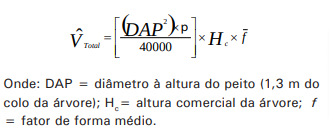

In [30]:
((data['dap']**2)*pi/40000) * data['ht'] * 0.6854


0      0.010829
1      0.009458
2      0.009774
3      0.003976
4      0.019243
         ...   
654    0.013783
655    0.034318
656    0.015752
657    0.006452
658    0.017044
Length: 659, dtype: float64

In [31]:
ff = 0.6854
data.insert(12, 'vol', ((data['dap']**2)*pi/40000) * data['ht'] * ff)

Podemos também proceder com o cálculo do volume de madeira empilhado de cada árvore (em estéreo)
Ou seja, este é o volume da madeira empilhada, enquanto o volume anterior se refere ao volume líquido, em m³.
PAra isso, usamos um fator de 'cubicação', geralmente entre 1.5 e 2.0

In [32]:
fc = 1.5
data.insert(13, 'vol_st', (data['vol'] * fc))

In [33]:
# Criar alguma simbologia para o 'endemismo'?
# Criar a coluna 'volume' a partir de fator de forma
# Continuar seguindo o pseudocódigo

# Só deixa de ter a Data engineering quando não precisarmos mais mexer no DF.

In [34]:
data[data['placa'] == 2852]

,n_arv,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,vol,vol_st,ht,coord_x,coord_y
101,102,10,2852,Thymelaeaceae,Daphnopsis fasciculata (Meisn.) Nevling,Daphnopsis fasciculata,Embira,Árvore,NE,é endêmica do Brasil,14.5,4.615493,0.004014,0.006020,3.5,729906.804,6959146.795
162,163,14,2852,Morta,Morta,Morta,Morta,-,-,-,70.0,22.281692,0.213806,0.320709,8.0,729960.584,6959254.318
